<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/tensorflow/5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_Data_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`

- 데이터 관련 API자세히 배웁니다.
- tf.data
  - tf.data.Dataset
  - classes ~ Iterator, Options, ~

## tf.data.datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
builders = tfds.list_builders()        #텐서플로우 데이터셋의 여러가지 기능들 확인
print(builders)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'dementiabank', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'emnist', 'eraser_multi_r

In [ ]:
data, info = tfds.load('mnist', with_info=True)            #info를 true로 설정해야 mnist의 기본정보를 같이 가져올수있다.
train_data, test_data = data['train'], data['test']

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [ ]:
import numpy as np

In [ ]:
num_items = 20
num_list = np.arange(num_items)

In [ ]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [ ]:
num_list_dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [ ]:
import itertools

def gen():
  for i in itertools.count(1):
    yield (i, [1] * i)           # i만큼 1을 추가

dataset = tf.data.Dataset.from_generator(
    gen,
    output_types=(tf.int64, tf.int64),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([None]))
)
)

list(dataset.take(3).as_numpy_iterator())         #넘파이로 바꾼것을 리스트로 변환

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [ ]:
for item in dataset:
  print(item)             #무한출력

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
(<tf.Tensor: shape=(), dtype=int64, numpy=1921>, <tf.Tensor: shape=(1921,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1922>, <tf.Tensor: shape=(1922,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1923>, <tf.Tensor: shape=(1923,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1924>, <tf.Tensor: shape=(1924,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1925>, <tf.Tensor: shape=(1925,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1926>, <tf.Tensor: shape=(1926,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1927>, <tf.Tensor: shape=(1927,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>)
(<tf.Tensor: shape=(), dtype=int64, numpy=1928>, <tf.Tensor: shape=(

KeyboardInterrupt: ignored

In [ ]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen, args=[10],
    output_types=(tf.int64, tf.int64),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [ ]:
dataset = num_list_dataset.repeat(3).batch(7)

In [ ]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [ ]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [ ]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [ ]:
from tensorflow.data import Dataset

In [ ]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [ ]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

<MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [ ]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)         #원하는 타입의 형태만 출력가능
list(result.as_numpy_iterator())

[1, 2, 3]

In [ ]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [ ]:
def h(x):
  return 10.5, ["One", "Two", "Three"], np.array([1., 2.], dtype=np.float64)

result = dataset.map(h)
result.element_spec                                                                #자동으로 tf타입으로 변형

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [ ]:
def i(x):
  return (10.5, [12.5, 11]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.float32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [ ]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])           #람다함수 사용
dataset = dataset.filter(lambda x: x < 5)
list(dataset.as_numpy_iterator())

[1, 2, 3, 4]

In [ ]:
def filter_fn(x):                          #함수 직접 지정
  return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8PXI6R/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8PXI6R/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete8PXI6R/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

### get_next()

In [ ]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
a = np.random.randint(0, 10, size=(2, 3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)
print(iterator.get_next())
print(iterator.get_next())

[[1 0 4]
 [5 5 7]]
tf.Tensor([1 0 4], shape=(3,), dtype=int64)
tf.Tensor([5 5 7], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [ ]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
tset_ds = test_ds.batch(32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 확인

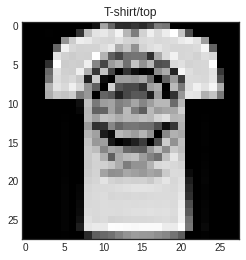

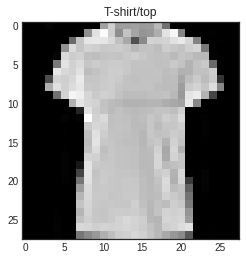

In [ ]:
for image, label in train_ds.take(2):
  plt.title("{}".format(class_names[label[0]]))
  plt.imshow(image[0, :, :], cmap='gray')                    #현재이미지 출력 color map은 gray
  plt.show()

### 모델 생성
- 임의의 모델

In [ ]:
def build_model():
  input = Input(shape=(28, 28), name='input')
  flatten = Flatten(input_shape=[28, 28], name='flatten')(input)

  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)

  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)

  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)

  output = Dense(10, activation='softmax', name='output')(dropout4)

  model = Model(inputs=[input], outputs=[output])

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_24 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_24 (Dropout)        (None, 256)               0         
                                                           

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

model = build_model()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization_28 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 256)               0         
                                                                 
 dropout_28 (Dropout)        (None, 256)          

5~6분 소요

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=200,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb])

Epoch 1/200
165/165 [==============================] - 5s 19ms/step - loss: 2.5736 - acc: 0.1403 - val_loss: 1.9793 - val_acc: 0.4301
Epoch 2/200
165/165 [==============================] - 3s 17ms/step - loss: 2.2037 - acc: 0.2119 - val_loss: 1.6772 - val_acc: 0.5309
Epoch 3/200
165/165 [==============================] - 3s 17ms/step - loss: 1.9779 - acc: 0.2812 - val_loss: 1.4937 - val_acc: 0.5897
Epoch 4/200
165/165 [==============================] - 3s 17ms/step - loss: 1.8152 - acc: 0.3287 - val_loss: 1.3535 - val_acc: 0.6089
Epoch 5/200
165/165 [==============================] - 3s 19ms/step - loss: 1.6875 - acc: 0.3699 - val_loss: 1.2504 - val_acc: 0.6194
Epoch 6/200
165/165 [==============================] - 3s 19ms/step - loss: 1.5875 - acc: 0.4026 - val_loss: 1.1618 - val_acc: 0.6351
Epoch 7/200
165/165 [==============================] - 3s 19ms/step - loss: 1.4992 - acc: 0.4350 - val_loss: 1.0941 - val_acc: 0.6330
Epoch 8/200
165/165 [==============================] - 3s 19ms

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 모델 평가

In [ ]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 1s 5ms/step - loss: 0.4531 - acc: 0.8390


[0.4530732035636902, 0.8389999866485596]

### 결과 확인

In [ ]:
test_img = x_test[0, :, :]
print(test_img.shape)

(28, 28)


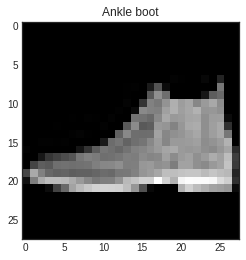

In [ ]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

In [ ]:
pred = model.predict(test_img.reshape(1, 28, 28))

In [ ]:
pred.shape

(1, 10)

In [ ]:
pred

array([[3.8567872e-05, 4.7198897e-05, 2.1985979e-05, 2.8907771e-05,
        3.0865860e-05, 3.3825774e-02, 1.2537799e-05, 1.4831857e-01,
        1.9477896e-04, 8.1748074e-01]], dtype=float32)

In [ ]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [ ]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [ ]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [ ]:
preds_arg = np.argmax(preds, -1)

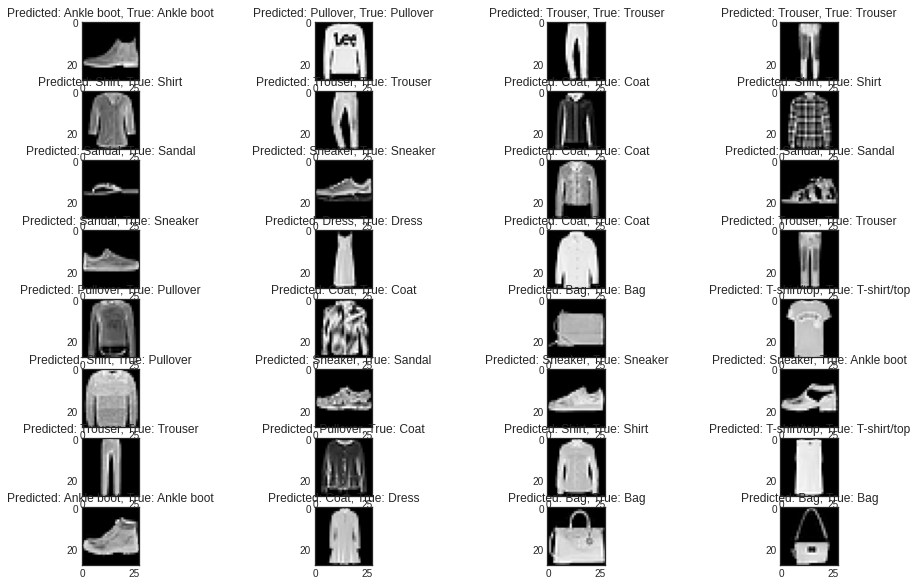

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

plt.figure(figsize=(16, 10))

for idx in range(1, 33, 1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title("Predicted: {}, True: {}".format(class_names[preds_arg[idx-1]],
                                             class_names[test_batch_y[idx-1]]))

  plt.imshow(test_batch[idx-1], cmap='gray')
plt.show()